# Stock Market Prediction using Machine Learning and Deep Learning

### Importing Libraries

In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import yfinance as yf

### Getting Data

In [3]:

tickers = ['TRIDENT.NS','TCS.NS']
start = dt.datetime.today() - dt.timedelta(5 * 365)
end = dt.datetime.today()

for i in tickers:
    data = yf.download(i,start,end)
    data.to_csv(f'{i}.csv', index=True)

a = data.sort_values('Date')
print(a)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-03-05  2005.000000  2007.000000  1976.599976  1988.099976  1779.322021   
2019-03-06  1989.300049  2015.000000  1985.050049  1999.599976  1789.614502   
2019-03-07  2005.000000  2024.050049  2000.199951  2013.300049  1801.875732   
2019-03-08  2025.000000  2033.000000  2010.050049  2022.699951  1810.288452   
2019-03-11  2028.900024  2033.000000  2003.650024  2014.800049  1803.218262   
...                 ...          ...          ...          ...          ...   
2024-02-23  4130.000000  4130.000000  4046.399902  4052.100098  4052.100098   
2024-02-26  4036.000000  4050.000000  3982.750000  4001.050049  4001.050049   
2024-02-27  3999.000000  4124.000000  3999.000000  4104.399902  4104.399902   
2024-02-28  4095.600098  4154.899902  4089.000000  4118.950195  4118.950195   
2024-02-29  4099.000000  4138.100098  4064.550049  4

We will implement our models/techniques on different 3 stocks based on market size.

In [4]:
tcs = pd.read_csv('TCS.NS.csv')

trident = pd.read_csv('TRIDENT.NS.csv')

### LSTM

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

 - The input gate: The input gate adds information to the cell state

 - The forget gate: It removes the information that is no longer required by the model

 - The output gate: Output Gate at LSTM selects the information to be shown as output


#### On TCS





930/930 - 33s - loss: 0.0034 - 33s/epoch - 35ms/step
Fitting Model
8/8 [==============================] - 2s 21ms/step
RMSE is 84.83640397377977


Text(0.5, 1.0, 'Predicted adj close price vs actual close price on TCS ')

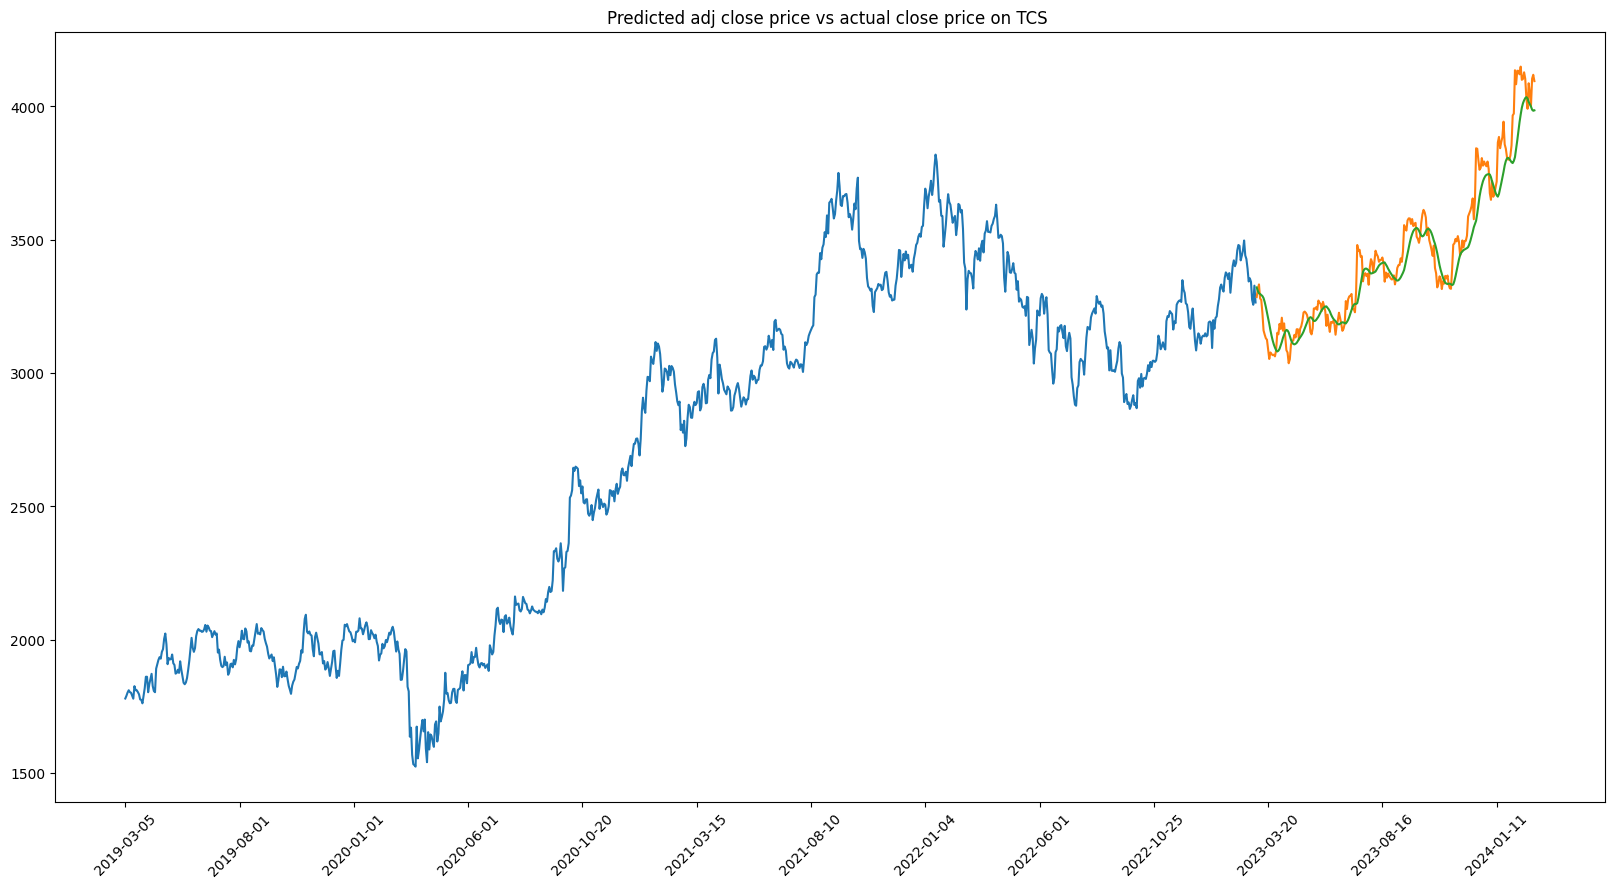

In [5]:
#importing required libraries
tcs = pd.read_csv('TCS.NS.csv')
tcs.index=tcs['Date']

tcs_df = tcs.sort_index(ascending=True, axis=0)
tcs_new = pd.DataFrame(index=range(0, len(tcs)), columns=['Date', 'Adj Close'])

for i in range(0,len(tcs_df)):
    tcs_new['Date'][i] = tcs_df['Date'][i]
    tcs_new['Adj Close'][i] = tcs_df['Adj Close'][i]
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import mean_squared_error
#creating dataframe
tcs_lstm = pd.DataFrame(index=range(0,len(tcs_df)),columns=['Date', 'Adj Close'])
for i in range(0,len(tcs_df)):
    tcs_lstm['Date'][i] = tcs_df['Date'][i]
    tcs_lstm['Adj Close'][i] = tcs_df['Adj Close'][i]

#setting index
tcs_lstm.index = tcs_lstm.Date
tcs_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tcs_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tcs_lstm[len(tcs_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tcs_lstm[:990]
valid = tcs_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.xticks(range(0,tcs_df.shape[0],100),tcs_df['Date'].loc[::100],rotation=45)
plt.title('Predicted adj close price vs actual close price on TCS ')

#### On Trident

930/930 - 33s - loss: 0.0034 - 33s/epoch - 36ms/step
Fitting Model
8/8 [==============================] - 2s 22ms/step
RMSE is 1.796007483996389


Text(0.5, 1.0, 'Predicted adj close price vs actual close price on Trident ')

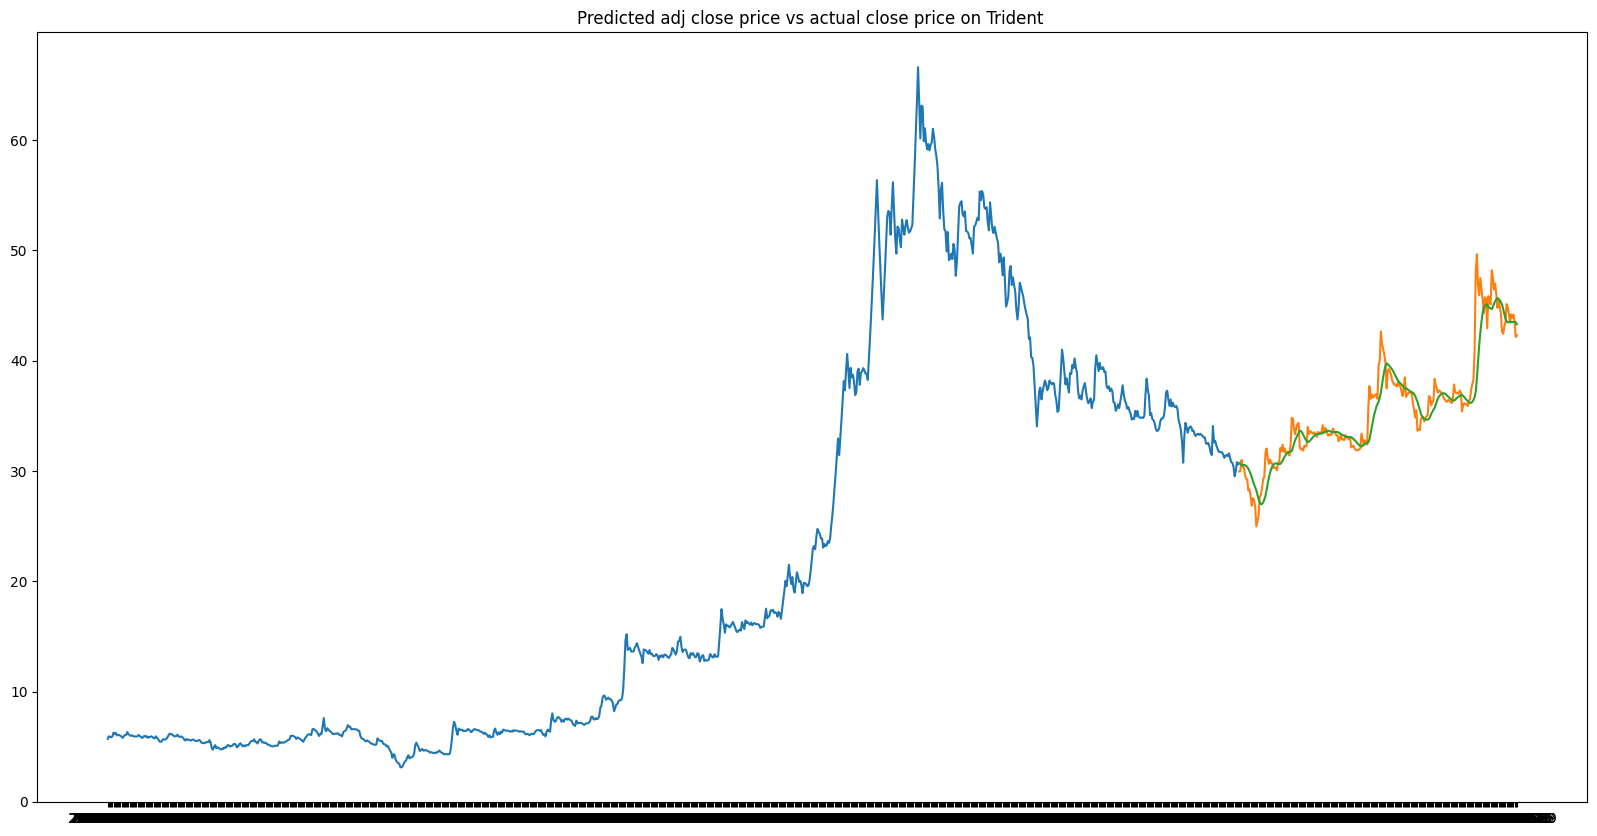

In [6]:
#creating dataframe
tri_lstm = pd.DataFrame(index=range(0,len(trident)),columns=['Date', 'Adj Close'])
for i in range(0,len(trident)):
    tri_lstm['Date'][i] = trident['Date'][i]
    tri_lstm['Adj Close'][i] = trident['Adj Close'][i]

#setting index
tri_lstm.index = tri_lstm.Date
tri_lstm.drop('Date', axis=1, inplace=True)


#creating train and test sets
dataset = tri_lstm.values

train = dataset[0:990,:]
valid = dataset[990:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
print('Fitting Model')
#predicting 246 values, using past 60 from the train data
inputs = tri_lstm[len(tri_lstm) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(mean_squared_error(closing_price,valid))
print('RMSE is',rms)

#for plotting
train = tri_lstm[:990]
valid = tri_lstm[990:]
valid['Predictions'] = closing_price
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.title('Predicted adj close price vs actual close price on Trident ')